# Detecting COVID-19 & Viral Pneumonia in X-Ray Images

Dataset from: https://www.kaggle.com/tawsifurrahman/covid19-radiography-database?

Code: https://keisen.github.io/tf-keras-vis-docs/examples/attentions.html

Other COVID-19 X-Rays @ https://www.kaggle.com/nabeelsajid917/covid-19-x-ray-10000-images?

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from random import shuffle
import random
import os

In [4]:
try:
    import vis
except:
    !pip install keras-vis
    import vis

# Define Constants

In [6]:
root_path = '../Week 7/COVID-19_Radiography_Dataset/'
l1 = os.listdir(root_path)
print(l1)

['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']


In [ ]:
labels = []
image_paths = []
#mask_paths = []

for i in l1:
    #print(i)
    l2 = os.listdir(root_path+i)

    for j in l2:
        #print("i is", i)
        l3 = os.listdir(root_path+i+'/'+j)
        for k in l3:
            if (j=='images') and (".ipynb_checkpoints" != k):
                # img = Image.open(root_path+i+'/'+j+'/'+k)
                image_paths.append(root_path+i+'/'+j+'/'+k)
                labels.append(i)

In [ ]:
uniq_cnt = np.unique(labels, return_counts= True)
uniq_cnt

(array(['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia'], dtype='<U15'),
 array([ 3616,  6012, 10192,  1345]))

In [ ]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
import random

In [ ]:
labels = []
file_path = []

for i in l1:
    #print(i)
    l2 = os.listdir(root_path+i+"/images")

    if i == 'Viral_Pneumonia':
        l3 = l2
    else:
        random.seed(1234)
        l3 = random.sample(l2, int(len(l2)*0.5))

    for j in l3:
        j_ = j.replace(" ", "_")
        os.system(f"cp {root_path}{i}/images/'{j}' train/{j_}")
        file_path.append(f"train/{j_}")
        labels.append(i)

cp: -r not specified; omitting directory 'COVID-19_Radiography_Dataset/Normal/images/.ipynb_checkpoints'
cp: -r not specified; omitting directory 'COVID-19_Radiography_Dataset/Viral_Pneumonia/images/.ipynb_checkpoints'
cp: -r not specified; omitting directory 'COVID-19_Radiography_Dataset/COVID/images/.ipynb_checkpoints'


In [ ]:
np.unique(labels, return_counts = True)

(array(['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia'], dtype='<U15'),
 array([1808, 3006, 5096, 1346]))

In [ ]:
len(file_path)

11256

# Prepare Training Data

In [ ]:
df = pd.DataFrame({
    'filename': file_path,
    'category': labels
})

In [ ]:
df.head()

,filename,category
0,train/Normal-3060.png,Normal
1,train/Normal-5132.png,Normal
2,train/Normal-9515.png,Normal
3,train/Normal-5331.png,Normal
4,train/Normal-7132.png,Normal


In [ ]:
df.tail()

,filename,category
11251,train/COVID-1321.png,COVID
11252,train/COVID-2307.png,COVID
11253,train/COVID-1135.png,COVID
11254,train/COVID-1883.png,COVID
11255,train/COVID-3155.png,COVID


In [ ]:
df["cls"] = np.where(df.category == "Normal", 0, np.where(df.category == "COVID", 1, np.where(df.category == "Viral_Pneumonia", 2, 3)))

In [ ]:
df.category.value_counts()

category
Normal             5096
Lung_Opacity       3006
COVID              1808
Viral_Pneumonia    1346
Name: count, dtype: int64

# Compare Frequencies

<Axes: xlabel='category'>

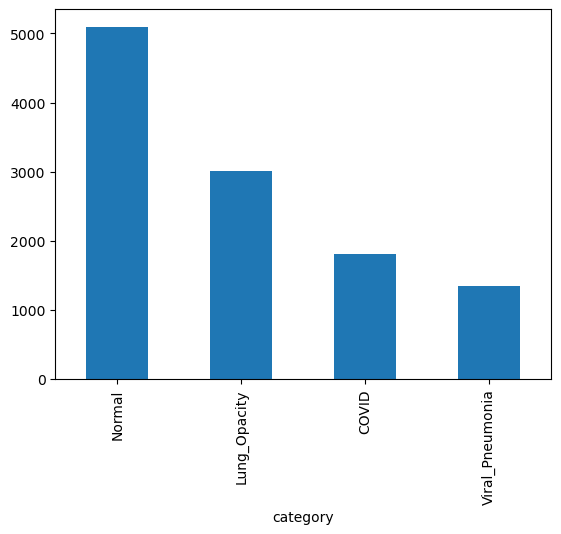

In [ ]:
'''
0 Represents Normal
1 Represents COVID
2 Represents Viral_Pneumonia
3 Represents Lung_Opacity
'''
df['category'].value_counts().plot.bar()

# Load Sample Image

In [6]:
import pickle
df = pickle.load(open("/content/drive/MyDrive/ECO5350/train_df.pkl", "rb"))

In [7]:
df.shape

(11256, 3)

In [9]:
#!unzip /content/drive/MyDrive/ECO5350/train_img.zip -d train

Normal-8372.png


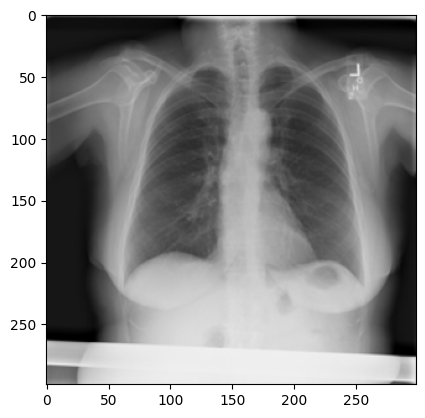

In [10]:
sample = random.choice(os.listdir("train/"))
image = load_img("train/" + sample)

print(sample)
plt.imshow(image)

# Build Model

1. **Input Layer**: This represents our input image data. It will reshape the image into a single dimensional array. For example, if your image is 64x64, it will convert to (4096,1) array (64x64 = 4096).


2. **Conv Layer**: This layer will extract features from image.


3. **Pooling Layer**: This layer will reduce the spatial volume of input image after convolution.


4. **Fully Connected Layer**: This will connect the network from a layer to another layer


5. **Output Layer**: This is the predicted values layer.

In [11]:
IMAGE_WIDTH = 256
IMAGE_HEIGHT = 256

IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(64, (7, 7), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax', name='predictions'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 64)      9472      
                                                                 
 batch_normalization (Batch  (None, 250, 250, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 125, 125, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 125, 125, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 121, 121, 128)     204928    
                                                                 
 batch_normalization_1 (Bat  (None, 121, 121, 128)     5

# Callbacks

## Early Stop

To prevent overfitting, we will stop the learning after 10 epochs and if the val_loss value has not decreased

In [13]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)

# Learning Rate Reduction

We will reduce the learning rate when then accuracy does not increase for 2 steps

In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience = 2,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.00001)

callbacks = [earlystop, learning_rate_reduction]

# Shuffle Data

In [15]:
#pickle.dump(df, open("train_df.pkl", "wb"))

In [15]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=1234)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [16]:
train_df['category'].shape

(9004,)

In [17]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size = 48

# Training Generator

In [19]:
train_datagen = ImageDataGenerator (

    #image sample augment
    rotation_range = 15,
    rescale = 1./255,

    shear_range = 0.1,
    zoom_range = 0.2,

    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

train_generator = train_datagen.flow_from_dataframe (

    train_df,
    './',
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 9003 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


# Validation Generator

In [20]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe (

    validate_df,
    './',
    x_col ='filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 2250 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 2 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


# Visualize Generator

In [21]:
example_df = train_df.sample(n=1).reset_index(drop=True)

example_generator = train_datagen.flow_from_dataframe (

    example_df,
    './',
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical'
)

Found 1 validated image filenames belonging to 1 classes.


                filename category  cls
0  train/Normal-7732.png   Normal    0


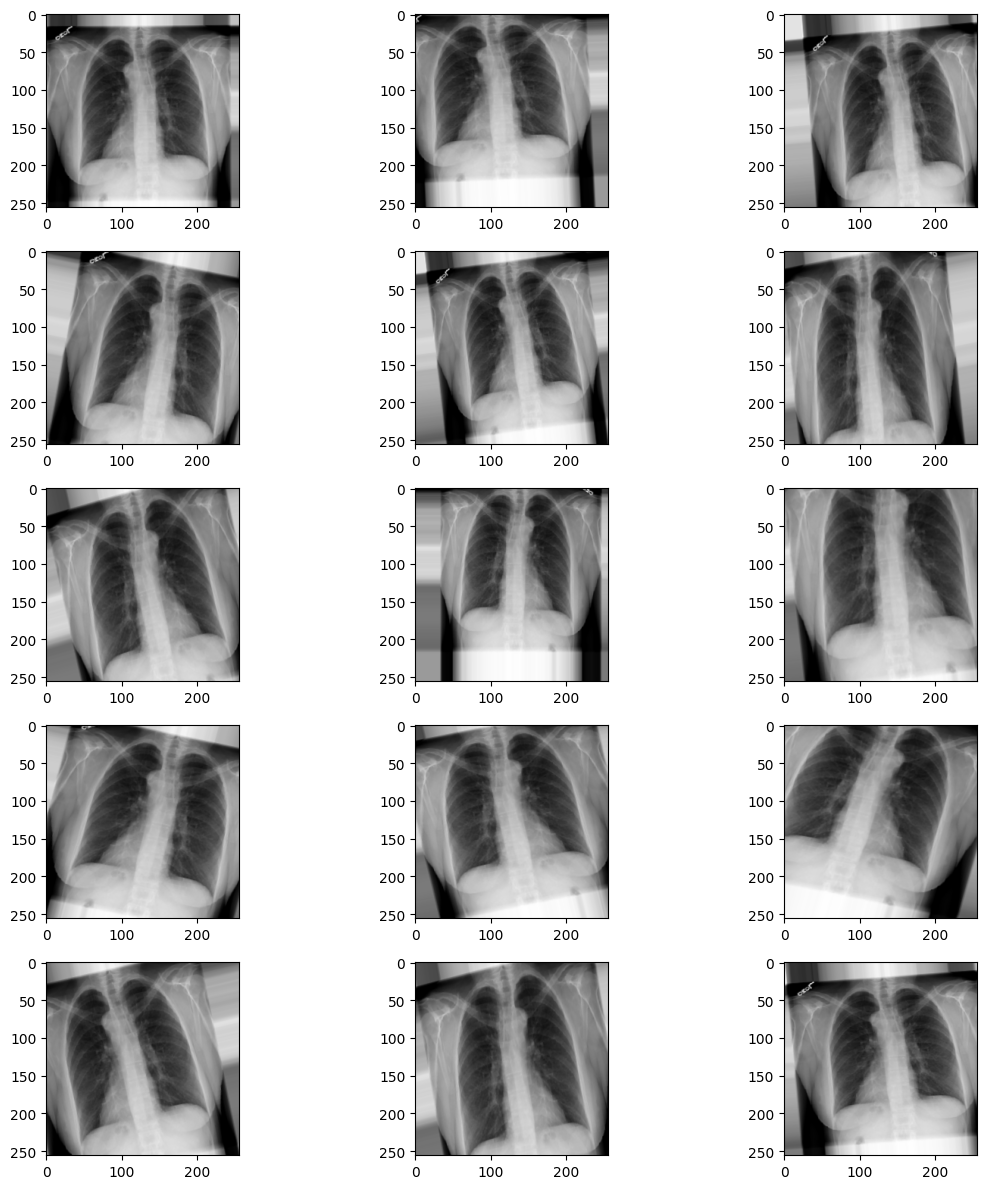

In [22]:
print(example_df)

plt.figure(figsize=(12, 12))

for i in range(0, 15):

    plt.subplot(5, 3, i+1)

    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break

plt.tight_layout()
plt.show()

In [23]:
%%time

epochs = 25

history = model.fit(
    train_generator,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_validate//batch_size,
    steps_per_epoch = total_train//batch_size,
    callbacks = callbacks
)

Epoch 1/25
187/187 [==============================] - 247s 1s/step - loss: 1.4786 - accuracy: 0.4620 - val_loss: 1.4666 - val_accuracy: 0.2817 - lr: 0.0010
Epoch 2/25
187/187 [==============================] - 219s 1s/step - loss: 1.1051 - accuracy: 0.5658 - val_loss: 1.0343 - val_accuracy: 0.5711 - lr: 0.0010
Epoch 3/25
187/187 [==============================] - 225s 1s/step - loss: 0.9785 - accuracy: 0.6056 - val_loss: 1.3265 - val_accuracy: 0.3759 - lr: 0.0010
Epoch 4/25
187/187 [==============================] - ETA: 0s - loss: 0.8932 - accuracy: 0.6381
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
187/187 [==============================] - 232s 1s/step - loss: 0.8932 - accuracy: 0.6381 - val_loss: 1.3888 - val_accuracy: 0.3940 - lr: 0.0010
Epoch 5/25
187/187 [==============================] - 215s 1s/step - loss: 0.8373 - accuracy: 0.6602 - val_loss: 0.8393 - val_accuracy: 0.6898 - lr: 5.0000e-04
Epoch 6/25
187/187 [==============================] - 2

In [24]:
model.save_weights("COVID-Model-{}-{}-{}-{}.h5".format(IMAGE_WIDTH, 3, batch_size, epochs))

# Visualize Training Performance

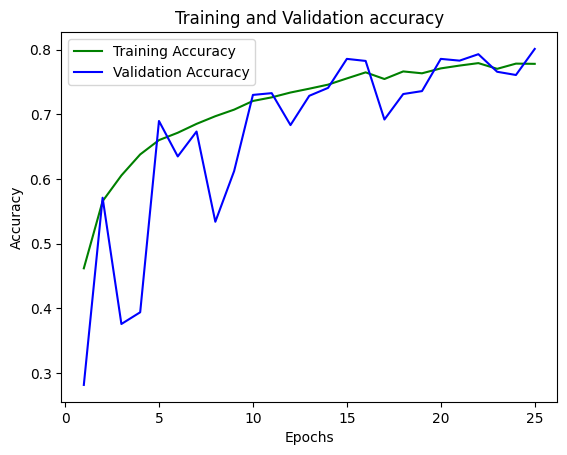

In [25]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
numEpochs = range(1,  epochs + 1)
plt.plot(numEpochs, accuracy, 'g', label='Training Accuracy')
plt.plot(numEpochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

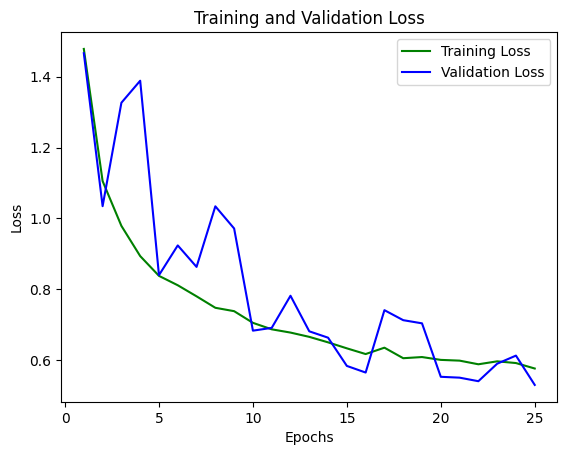

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']
numEpochs = range(1,  epochs + 1)
plt.plot(numEpochs, loss, 'g', label='Training Loss')
plt.plot(numEpochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Prepare Testing Data

In [27]:
# test_labels = []
# test_files = []

# for i in l1:
#     #print(i)
#     l2 = os.listdir(root_path+i+"/images")
#     random.seed(1234)
#     l3 = random.sample(l2, 100)
#     for j in l3:
#         j_ = j.replace(" ", "_")
#         os.system(f"cp {root_path}{i}/images/'{j}' test/{j_}")
#         test_files.append(f"train/{j_}")
#         test_labels.append(i)

NameError: name 'l1' is not defined

In [ ]:
len(test_files)

In [ ]:
test_filenames = os.listdir('./test')
print(len(test_filenames))

test_df = pd.DataFrame({
    'filename': ["test/"+i for i in test_filenames]
})

nb_samples = test_df.shape[0]

In [ ]:
test_df.head()

# Create Testing Generator

In [ ]:
test_gen = ImageDataGenerator(rescale = 1./255)
test_generator = test_gen.flow_from_dataframe(

    test_df,
    './',
    x_col = 'filename',
    y_col = None,
    class_mode = None,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    shuffle = False
)

# Form Predictions

In [ ]:
predict = model.predict(test_generator, steps = np.ceil(nb_samples/batch_size))

10/10 [==============================] - 1s 128ms/step


## Pick the category that has the highest probability

In [ ]:
test_df['category'] = np.argmax(predict, axis = 1)

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

<Axes: xlabel='category'>

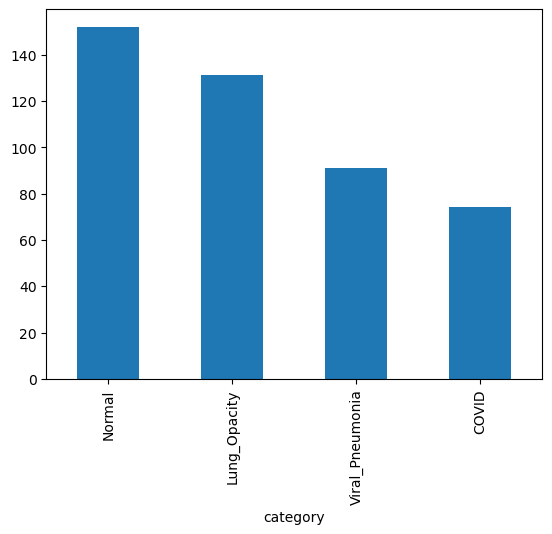

In [ ]:
test_df['category'].value_counts().plot.bar()

# Predicted result with images

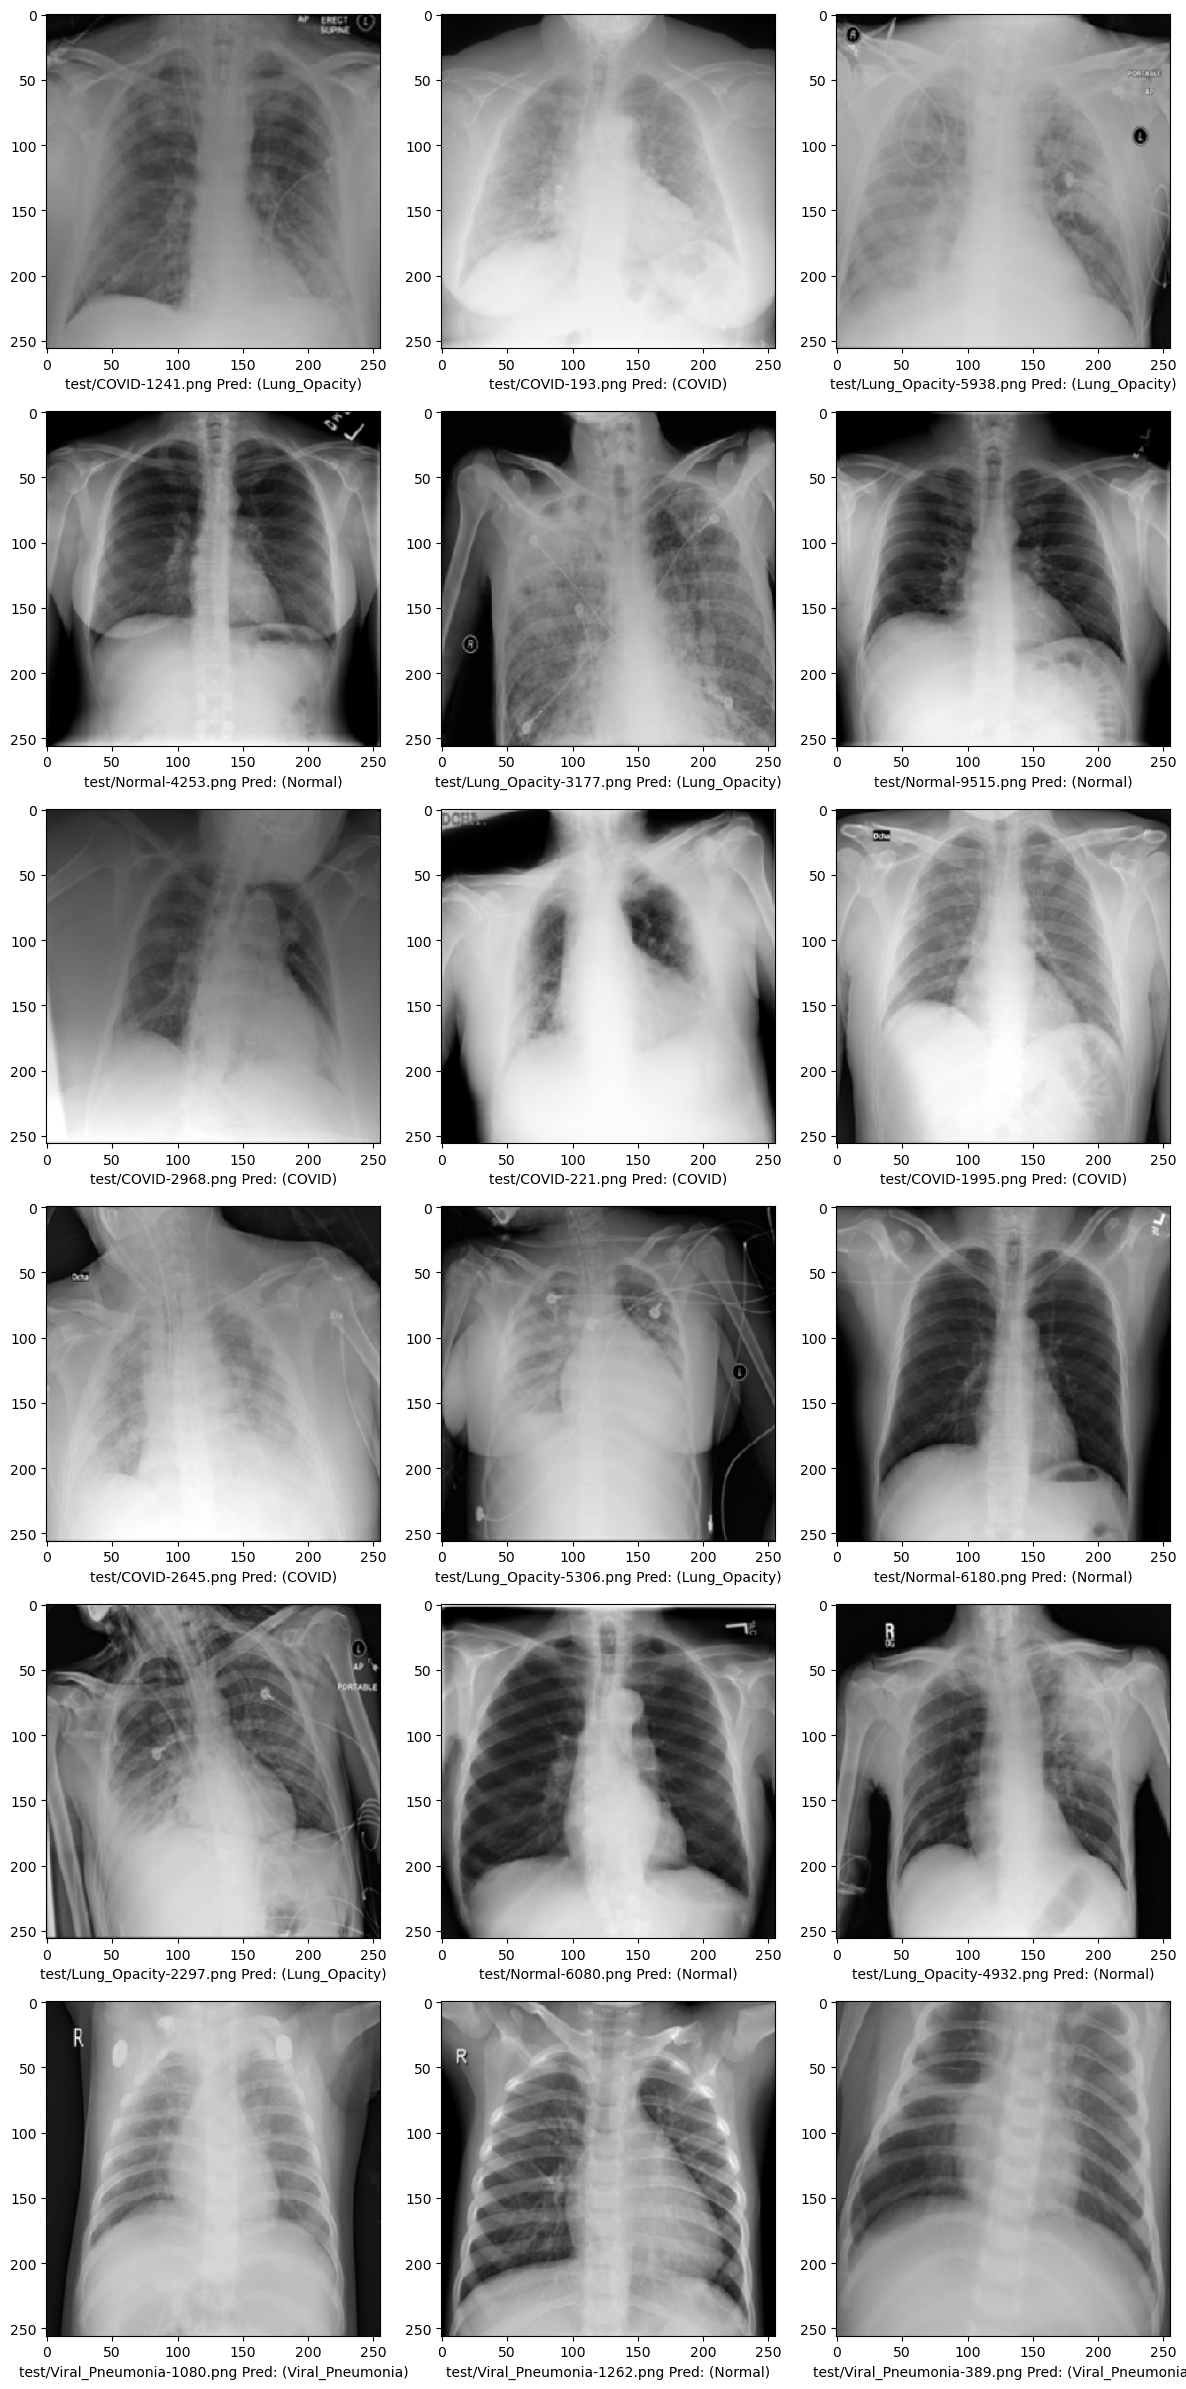

In [ ]:
sample_test = test_df.head(18)
sample_test.head()

plt.figure(figsize=(12, 24))

for index, row in sample_test.iterrows():

    filename = row['filename']
    category = row['category']

    img = load_img(filename, target_size=IMAGE_SIZE)

    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + ' Pred: (' + "{}".format(category) + ')' )

plt.tight_layout()
plt.show()

# Calculate Model Accuracy

In [ ]:
sample_test.head()

,filename,category
0,test/COVID-1241.png,Lung_Opacity
1,test/COVID-193.png,COVID
2,test/Lung_Opacity-5938.png,Lung_Opacity
3,test/Normal-4253.png,Normal
4,test/Lung_Opacity-3177.png,Lung_Opacity


In [ ]:
sample_test = test_df
correctPredictions = 0

correctNormalPred = 0
correctCovidPred = 0
correctPneuPred = 0
correctOpaPred = 0

totalNormalPred = 0
totalCovidPred = 0
totalPneuPred = 0
totalOpaPred =0

for index, row in sample_test.iterrows():

    filename = row['filename']
    prediction = row['category']

    img = load_img(filename, target_size=IMAGE_SIZE)

    if 'Normal' in filename:

        if prediction == 'Normal':
            correctPredictions += 1
            correctNormalPred += 1

        totalNormalPred += 1

    if 'COVID' in filename:

        if prediction == "COVID":
            correctPredictions += 1
            correctCovidPred += 1

        totalCovidPred += 1

    if 'Viral_Pneumonia' in filename:

        if prediction == "Viral_Pneumonia":
            correctPredictions += 1
            correctPneuPred += 1

        totalPneuPred += 1

    if 'Lung_Opacity' in filename:

        if prediction == 'Lung_Opacity':
            correctPredictions += 1
            correctOpaPred += 1

        totalOpaPred += 1


In [ ]:
print('Model Accuracy:', "{:.2%}".format(correctPredictions / test_df.shape[0]))
print('Correct Predictions:', correctPredictions, 'Total Predictions:', test_df.shape[0])

print('\nNormal Predictions:', correctNormalPred, 'Accuracy', "{:.2%}".format(correctNormalPred /  totalNormalPred))
print('COVID Predictions:', correctCovidPred, 'Accuracy', "{:.2%}".format(correctCovidPred /  totalCovidPred))
print('Viral_Pneumonia Predictions:', correctPneuPred, 'Accuracy', "{:.2%}".format(correctPneuPred / totalPneuPred))
print('Lung_Opacity Predictions:', correctOpaPred, 'Accuracy', "{:.2%}".format(correctOpaPred / totalOpaPred))

Model Accuracy: 82.59%
Correct Predictions: 370 Total Predictions: 448

Normal Predictions: 96 Accuracy 96.00%
COVID Predictions: 70 Accuracy 70.00%
Viral_Pneumonia Predictions: 90 Accuracy 90.00%
Lung_Opacity Predictions: 114 Accuracy 77.03%


In [ ]:
test_df["observed"] = [i.split("-")[0].split("/")[1] for i in test_df.filename]

In [ ]:
test_df.head()

,filename,category,observed
0,test/COVID-1241.png,Lung_Opacity,COVID
1,test/COVID-193.png,COVID,COVID
2,test/Lung_Opacity-5938.png,Lung_Opacity,Lung_Opacity
3,test/Normal-4253.png,Normal,Normal
4,test/Lung_Opacity-3177.png,Lung_Opacity,Lung_Opacity


In [ ]:
print(classification_report(test_df.category, test_df.observed))

                 precision    recall  f1-score   support

          COVID       0.70      0.95      0.80        74
   Lung_Opacity       0.77      0.87      0.82       131
         Normal       0.96      0.63      0.76       152
Viral_Pneumonia       0.90      0.99      0.94        91

       accuracy                           0.83       448
      macro avg       0.83      0.86      0.83       448
   weighted avg       0.85      0.83      0.82       448



In [ ]:
confusion_matrix(test_df.category, test_df.observed)

array([[ 70,   3,   1,   0],
       [ 15, 114,   2,   0],
       [ 15,  31,  96,  10],
       [  0,   0,   1,  90]])

# Visualizing CNN Model

It is crucial that we visualize what our model is doing – and on what basis it is making its predictions. Saliency maps form a visualization of the pixels in the image that contribute the most to predictions by the model.

In [ ]:
from keras.models import load_model
model.load_weights('COVID-Model-256-3-48-25.h5')

In [ ]:
#pip install tensorflow[and-cuda] -U

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
image_titles = ['Normal', 'Lung_Opacity', 'COVID', 'Viral_Pneumonia',]

In [ ]:
img1 = load_img('./COVID-19_Radiography_Dataset/Normal/images/Normal-1000.png', target_size=(256, 256))
img2 = load_img('./COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-1000.png', target_size=(256, 256))
img3 = load_img('./COVID-19_Radiography_Dataset/COVID/images/COVID-1000.png', target_size=(256, 256))
img4 = load_img('./COVID-19_Radiography_Dataset/Viral_Pneumonia/images/Viral Pneumonia-1000.png', target_size=(256, 256))
images = np.asarray([np.array(img1), np.array(img2), np.array(img3), np.array(img4)])

In [ ]:
X = preprocess_input(images)

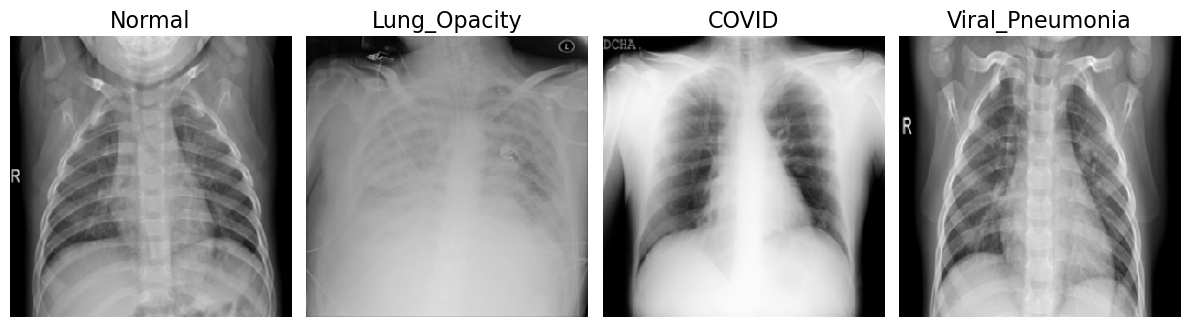

In [ ]:
# Rendering
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from matplotlib import cm

try:
    from tf_keras_vis.gradcam import Gradcam
except:
    !pip install tf-keras-vis
    from tf_keras_vis.gradcam import Gradcam

In [ ]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.utils.scores import CategoricalScore

replace2linear = ReplaceToLinear()

# Create ScoreCAM object
scorecam = Scorecam(model, model_modifier=replace2linear)

In [ ]:
score = CategoricalScore([0, 1, 2, 3])

In [ ]:
# Generate heatmap with Faster-ScoreCAM
cam = scorecam(score,
               X,
               penultimate_layer=-1,
               max_N=10)

2/2 [==============================] - 1s 7ms/step


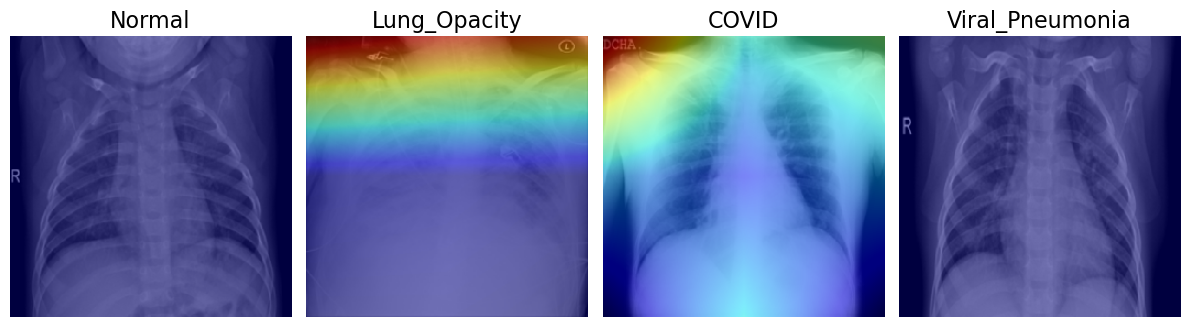

In [ ]:
# Render
f, ax = plt.subplots(nrows=1, ncols=4,figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()